## Import

In [57]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

## 파일명 의미

1. Patient number (101,102,...,226)

2. Recording index

3. Chest location

      a. Trachea (Tc)

      b. Anterior left (Al)

      c. Anterior right (Ar)

      d. Posterior left (Pl)

      e. Posterior right (Pr)

      f. Lateral left (Ll)

      g. Lateral right (Lr)

4.    Acquisition mode

     a. sequential/single channel (sc),

     b. simultaneous/multichannel (mc)

5.    Recording equipment

     a. AKG C417L Microphone (AKGC417L),

     b. 3M Littmann Classic II SE Stethoscope (LittC2SE),

     c. 3M Litmmann 3200 Electronic Stethoscope (Litt3200),

     d.  WelchAllyn Meditron Master Elite Electronic Stethoscope (Meditron)

### 환자 정보 확인

In [58]:
# 파일 경로
text_file_path = '/content/drive/MyDrive/AIFFEL_THON/ICBHI_Challenge/ICBHI_Challenge_diagnosis.txt'

# 텍스트 파일 읽기
diagnosis_df = pd.read_csv(text_file_path, sep='\t', header=None, names=['patient_id', 'disease'])

diagnosis_df.head()

,patient_id,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [41]:
print (diagnosis_df.disease.value_counts())
print ('')
print (diagnosis_df.disease.value_counts(normalize=True) *100)

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: disease, dtype: int64

COPD              50.793651
Healthy           20.634921
URTI              11.111111
Bronchiectasis     5.555556
Pneumonia          4.761905
Bronchiolitis      4.761905
LRTI               1.587302
Asthma             0.793651
Name: disease, dtype: float64


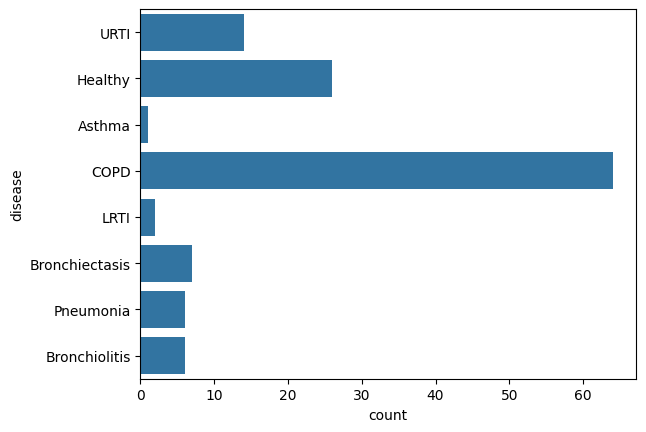

In [55]:
sns.countplot(diagnosis_df.disease)

plt.show()

In [59]:
path='/content/drive/MyDrive/AIFFEL_THON/ICBHI_final_database/'
files=[s.split('.')[0] for s in os.listdir(path) if '.txt' in s]

In [60]:
files[:10]

['204_2b5_Ar_mc_AKGC417L',
 '205_1b3_Al_mc_AKGC417L',
 '204_7p5_Pr_mc_AKGC417L',
 '204_7p5_Tc_mc_AKGC417L',
 '204_7p5_Al_mc_AKGC417L',
 '205_1b3_Ll_mc_AKGC417L',
 '205_1b3_Ar_mc_AKGC417L',
 '205_1b3_Pl_mc_AKGC417L',
 '205_2b2_Pr_mc_AKGC417L',
 '205_1b3_Pr_mc_AKGC417L']

In [61]:
def extract_patient_id(filename):
    return filename.split('_')[0]
length=len(files)
index=range(length)
i=0
patient_df=pd.DataFrame(index=index,columns=['patient_id','filename'])
for f in files:
    patient_df.iloc[i]['patient_id']=extract_patient_id(f)
    patient_df.iloc[i]['filename']=f
    i+=1

patient_df.head()

,patient_id,filename
0,204,204_2b5_Ar_mc_AKGC417L
1,205,205_1b3_Al_mc_AKGC417L
2,204,204_7p5_Pr_mc_AKGC417L
3,204,204_7p5_Tc_mc_AKGC417L
4,204,204_7p5_Al_mc_AKGC417L


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('patient_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('filename').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('patient_id')):
  _plot_series(series, series_name, i)
  fig.legend(title='patient_id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('filename')):
  _plot_series(series, series_name, i)
  fig.legend(title='filename', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['filename'].value_counts()
    for x_label, grp in _df_6.groupby('patient_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('patient_id')
_ = plt.ylabel('filename')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['patient_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='index', y='patient_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['filename'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='filename', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [72]:
import glob
directory_path = '/content/drive/MyDrive/AIFFEL_THON/ICBHI_final_database/'
text_files = glob.iglob(path + '/*.txt', recursive=True)
text_files_list = list(text_files)

dfs = []
for file in text_files_list:
    content = pd.read_csv(file, names = ["start_time", "end_time", "crackles", "wheezes"], delimiter = "\t")
    patient_number = file.split("_")[3][9:]
    content['patient'] = int(patient_number)
    dfs.append(content)
samples = pd.concat(dfs)

print("There are", len(samples), "cycles")
print("There are", len(text_files_list), "samples")

There are 6898 cycles
There are 920 samples


## Raw Audio Data

In [ ]:
data_list = df.to_dict('records')
print(data_list)

[{'Beginning of respiratory': 0.042, 'End of respiratory': 1.28, 'crackles': 0, 'wheezes': 1}, {'Beginning of respiratory': 1.28, 'End of respiratory': 2.697, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 2.697, 'End of respiratory': 4.006, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 4.006, 'End of respiratory': 5.506, 'crackles': 0, 'wheezes': 1}, {'Beginning of respiratory': 5.506, 'End of respiratory': 7.089, 'crackles': 0, 'wheezes': 1}, {'Beginning of respiratory': 7.089, 'End of respiratory': 8.863, 'crackles': 0, 'wheezes': 0}, {'Beginning of respiratory': 8.863, 'End of respiratory': 10.268, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 10.268, 'End of respiratory': 11.982, 'crackles': 1, 'wheezes': 1}, {'Beginning of respiratory': 11.982, 'End of respiratory': 13.732, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 13.732, 'End of respiratory': 15.589, 'crackles': 1, 'wheezes': 0}, {'Beginning of respiratory': 15.589, 'End of

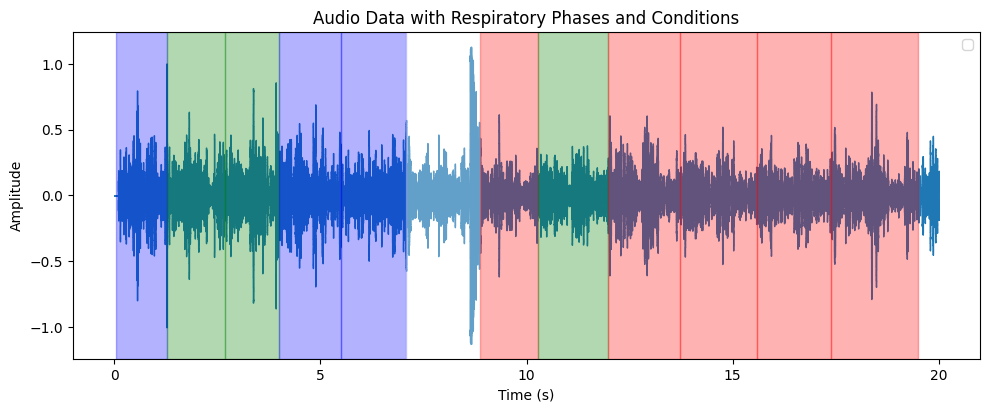

In [ ]:
# 오디오 파일 로딩
wav_file_path = '/content/drive/MyDrive/AIFFEL_THON/ICBHI_final_database/178_1b2_Lr_mc_AKGC417L.wav'  # 오디오 파일 경로
y, sr = librosa.load(wav_file_path, sr=4000)  # y는 오디오 신호, sr은 샘플링 레이트

# 파형 시각화
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]
    end = entry["End of respiratory"]
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles and wheezes:
        color = 'green'  # 둘 다 1일 경우
    elif crackles:
        color = 'red'  # crackles만 1일 경우
    elif wheezes:
        color = 'blue'  # wheezes만 1일 경우
    else:
        color = 'white'  # 둘 다 0일 경우 (여기서는 예시로 추가함)

    # 사각형 영역 표시
    plt.axvspan(start, end, color=color, alpha=0.3)

plt.legend()
plt.title('Audio Data with Respiratory Phases and Conditions')
plt.show()

### Mel-Spectogram

/usr/local/lib/python3.10/dist-packages/librosa/feature/spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


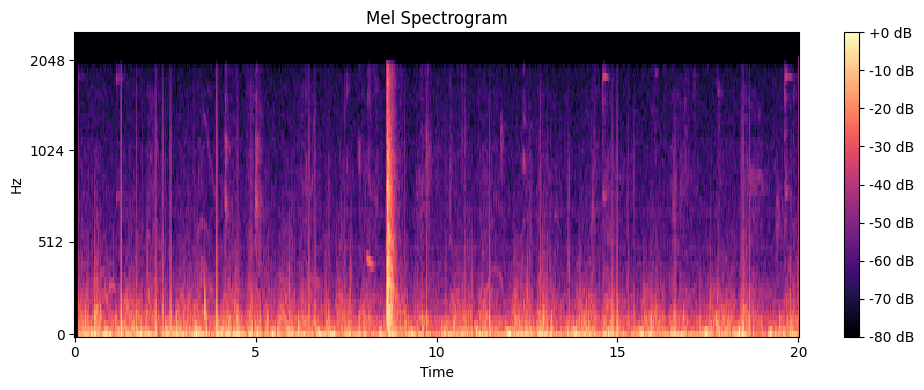

In [ ]:
# 예제 오디오 신호 'y'와 샘플링 레이트 'sr' 가정
# y, sr = librosa.load(audio_path, sr=sample_rate)

# 주어진 설정 값
sample_rate = 4000  # 샘플링 레이트
desired_length = 8  # 원하는 길이 (이 값은 melspectrogram 함수에 직접 사용되지 않음)
n_mels = 64  # 멜 필터뱅크의 수
nfft = 256  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
f_max = 2500  # 최대 주파수

# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

# 멜 스펙트로그램을 디스플레이하기 위한 코드 (선택 사항)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

### 소리 듣기 노이즈 제거 전

In [ ]:
from IPython.display import Audio

# 노이즈가 제거된 오디오 재생
Audio(data=y, rate=sr)

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut,fs, order=5):
    nyq= 0.5*fs
    low= lowcut/nyq
    high= highcut/nyq
    b,a = butter(order, [low,high], btype='band')
    return b,a

def butter_bandpass_filter(data, lowcut,highcut, fs, order=5):
    b,a= butter_bandpass( lowcut, highcut, fs, order)
    y=lfilter(b,a,data)
    return y

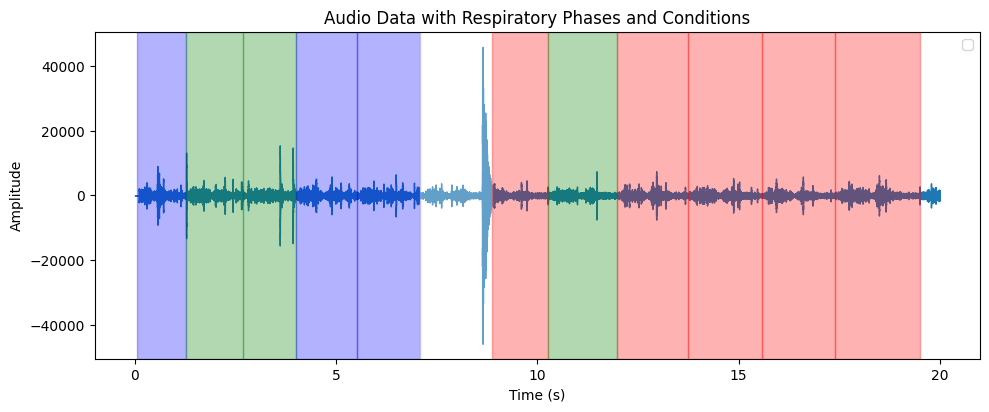

In [ ]:
# 오디오 파일 로딩
wav_file_path = '/content/drive/MyDrive/AIFFEL_THON/ICBHI_final_database/178_1b2_Lr_mc_AKGC417L.wav'  # 오디오 파일 경로
y2, sr = librosa.load(wav_file_path, sr=4000)  # y는 오디오 신호, sr은 샘플링 레이트
audio = y * (2 ** 15 - 1) / np.max(np.abs(y))
y2 = butter_bandpass_filter(audio, 100,520, sr, 3)

# 파형 시각화
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y2, sr=sr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()

# 데이터를 순회하며 각 구간에 대한 사각형 영역 표시
for entry in data_list:
    start = entry["Beginning of respiratory"]
    end = entry["End of respiratory"]
    crackles = entry["crackles"]
    wheezes = entry["wheezes"]

    # 색상 결정
    if crackles and wheezes:
        color = 'green'  # 둘 다 1일 경우
    elif crackles:
        color = 'red'  # crackles만 1일 경우
    elif wheezes:
        color = 'blue'  # wheezes만 1일 경우
    else:
        color = 'white'  # 둘 다 0일 경우 (여기서는 예시로 추가함)

    # 사각형 영역 표시
    plt.axvspan(start, end, color=color, alpha=0.3)

plt.legend()
plt.title('Audio Data with Respiratory Phases and Conditions')
plt.show()

### Mel-Spectogram

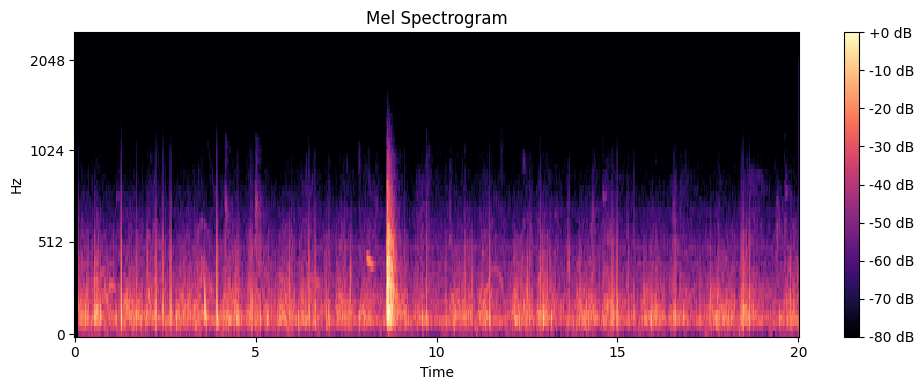

In [ ]:
# 주어진 설정 값
sample_rate = 4000  # 샘플링 레이트
desired_length = 8  # 원하는 길이 (이 값은 melspectrogram 함수에 직접 사용되지 않음)
n_mels = 64  # 멜 필터뱅크의 수
nfft = 256  # FFT 윈도우 크기
hop_length = nfft // 2  # 프레임 사이의 샘플 수
f_max = 2500  # 최대 주파수

# 수정된 속성을 사용하여 멜 스펙트로그램 계산
S = librosa.feature.melspectrogram(y=y2, sr=sample_rate, n_fft=nfft, hop_length=hop_length, n_mels=n_mels, fmax=f_max)

# 멜 스펙트로그램을 디스플레이하기 위한 코드 (선택 사항)
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), sr=sample_rate, hop_length=hop_length, y_axis='mel', fmax=f_max, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.tight_layout()
plt.show()

### 소리 듣기 노이즈 제거 후

In [ ]:
# 노이즈가 제거된 오디오 재생
Audio(data=y2, rate=sr)

Make Frames

Mel-Spectogram

Augmentation